In [126]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math

NUM_LED = 64
root = int(math.sqrt(NUM_LED))

In [127]:
# Store as string representation of colour of hex ie '#0f0f0f'
DEFAULT_COLOUR = '#ffffff'      # White
arr_led = [DEFAULT_COLOUR for i in range(NUM_LED)]

In [128]:
# Amplitude function
SCALE = 5

def get_size(led_colour: str) -> int:
    led_colour = led_colour.split('#')[1]
    BIT_CHK = 0xFF
    BYTE = 8
    size = int(led_colour, base=16)
    max = 0
    while size > 0:
        temp = size & BIT_CHK
        if temp > max:
            max = temp
        size = size >> BYTE
    return max

# Can replace with volume/amplitude matrix
size_led = [SCALE*get_size(led) for led in arr_led]

(<Figure size 640x480 with 1 Axes>, <Axes: >)

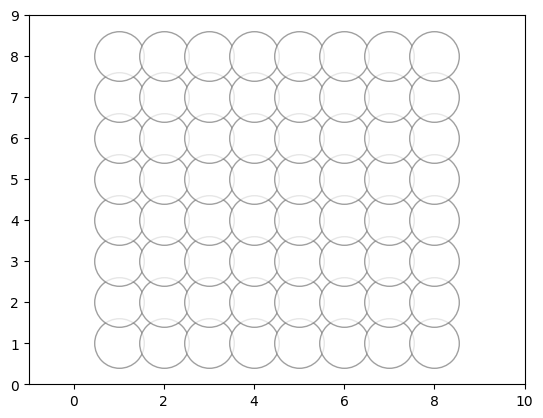

In [129]:
def led_scatter(colours: list):
    fig, ax = plt.subplots()

    for led in range(NUM_LED):
        if (led+1)%(root) == 0:
            ax.scatter(root, ((led//root)+1), s=SCALE*get_size(colours[led]), c=colours[led], alpha=0.75, edgecolors='grey')
        else:
            ax.scatter((led+1)%(root), ((led//root)+1), s=SCALE*get_size(colours[led]), c=colours[led], alpha=0.75, edgecolors='grey')

    ax.set(xlim=[-1, 10], ylim=[0, 9])

    return fig, ax

led_scatter(arr_led)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

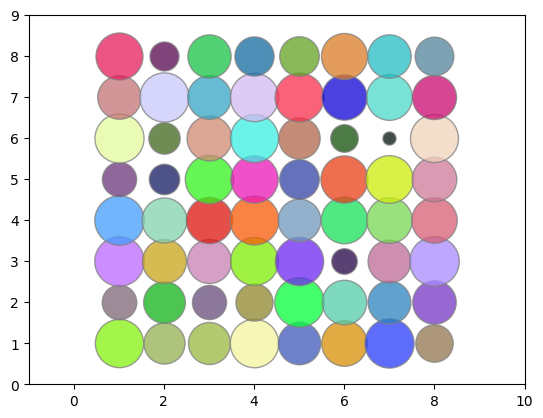

In [130]:
def random_colour() -> str:
    colour = str(hex(np.random.randint(0, 0xffffff))).replace('0x', '#')
    while len(colour) < 7:
        colour = colour.replace('#', '0')
        colour = '#'+colour
    return colour

def generate_random() -> list:
    led_arr = [random_colour() for led in range(NUM_LED)]
    return led_arr

led_scatter(generate_random())

In [131]:
def animate(i):
    led_arr = generate_random()
    
    plt.cla()
    
    plt.scatter()

    return fig

FRAMES = 30
INTERVAL = int(1000/30)

ani = FuncAnimation(fig, animate, interval=INTERVAL)

plt.show()

C:\Users\newbi\AppData\Local\Temp\ipykernel_24868\815134034.py:13: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, animate, interval=INTERVAL)
c:\Users\newbi\Downloads\UniHack24\venv\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
